### DATA ANALYTICS - UE20CS312
### PROJECT : Analyzing A/B Testing for an E-commerce company

### We want to understand the results of an A/B test run by an e-commerce website. Our goal is to work through this to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [5]:
df.shape

(294478, 5)

In [6]:
unique_user = df['user_id'].nunique()
unique_user

290584

In [7]:
df.converted.mean()

0.11965919355605512

In [8]:
not_line_up_1 = df.query(" group=='treatment' and landing_page=='old_page'").count()

In [9]:
not_line_up_2 = df.query(" group=='control' and landing_page=='new_page'").count()

In [10]:
not_line_up_1 + not_line_up_2

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [12]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
# Double Check all of the incorrect rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

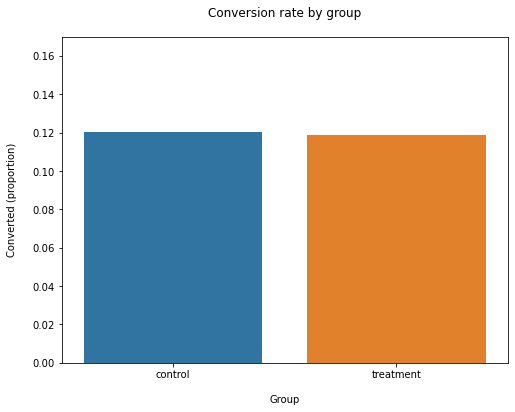

In [14]:
plt.figure(figsize=(8,6))

sns.barplot(x=df2['group'], y=df2['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

In [15]:
df2['user_id'].nunique()

290584

In [16]:
df2['user_id'].duplicated().sum()

1

In [17]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [18]:
# drop duplicates 
df2.drop_duplicates(keep='first')
df2.duplicated().sum()

0

In [19]:
round(df2.converted.mean(),4)

0.1196

In [20]:
#If an individual was in the control group, find the probability they converted.
control=df2.query("group=='control'").converted.mean()
round(control,4)

0.1204

In [21]:
#If an individual was in the treatment group, find the probability they converted.
treat=df2.query("group=='treatment'").converted.mean()
round(treat,4)

0.1188

In [22]:
new_page = float(df2.query("landing_page == 'new_page'")['user_id'].nunique())
total = float(df2.shape[0])
round(new_page / total,4)

0.5001

In [23]:
old_page = float(df2.query("landing_page == 'new_page' and converted == 1 ")['user_id'].nunique())
total = float(df2.query("landing_page == 'new_page'")['user_id'].nunique())
                  
round(old_page / total,4)

0.1188

Text(0, 0.5, 'Converted (proportion)')

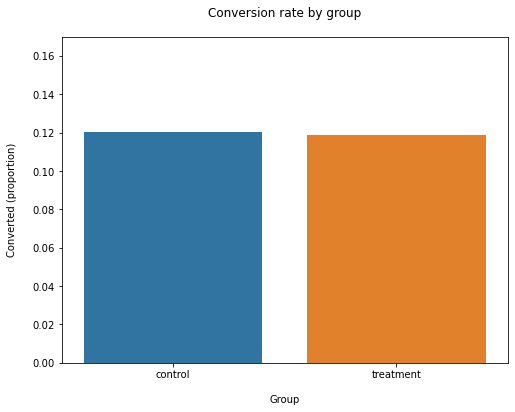

In [24]:
#Plot conversion rates of the control and treatment groups
plt.figure(figsize=(8,6))

sns.barplot(x=df2['group'], y=df2['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15)

### AB TEST
* H_O : p(new)-p(old)<=0  old has better conversion 
* H_1 : p(new)-p(old)>0   new has better conversion 


In [25]:
# Convert rate for p(new)
p_n = round(float(df2.converted.mean()),6)
p_n


0.119597

In [26]:
# Convert rate for p(old)
p_o =  round(float(df2.converted.mean()),6)
p_o

0.119597

In [27]:
# Unique Number of accessing new page 
N_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
N_new

145310

In [28]:
# Unique Number of accessing old page 
N_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
N_old

145274

In [29]:
new_page_converted = np.random.choice([0,1] , N_new , p=(p_n,1-p_n))
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
old_page_converted = np.random.choice([0,1] , N_old , p=(p_o,1-p_o))
old_page_converted 

array([1, 1, 1, ..., 1, 1, 1])

In [31]:
new_page_converted.mean() , old_page_converted.mean()

(0.8811368797742757, 0.8795242094249487)

In [32]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

0.0016126703493269945

In [33]:
p_diffs=[]
new_convert=np.random.binomial(N_new, p_n, 10000)/N_new
old_convert=np.random.binomial(N_old, p_o, 10000)/N_old
p_diffs=new_convert-old_convert

(array([   7.,   78.,  473., 1454., 2732., 2841., 1684.,  591.,  125.,
          15.]),
 array([-4.67542629e-03, -3.75591474e-03, -2.83640318e-03, -1.91689162e-03,
        -9.97380068e-04, -7.78685127e-05,  8.41643043e-04,  1.76115460e-03,
         2.68066615e-03,  3.60017771e-03,  4.51968927e-03]),
 <BarContainer object of 10 artists>)

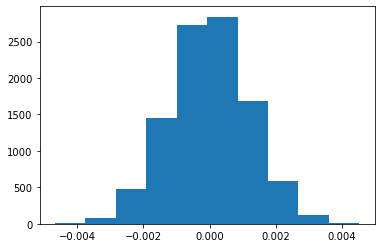

In [34]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)

In [35]:
converted_new = df2.query('converted == 1 and landing_page== "new_page"')['user_id'].nunique()
actual_new = float(converted_new) / float(N_new)

# number of landing old page and converted  / number of landing old page
converted_old = df2.query('converted == 1 and landing_page== "old_page"')['user_id'].nunique()
actual_old = float(converted_old) / float(N_old)

#observed difference in converted rate
obs_diff = actual_diff = actual_new - actual_old
obs_diff

-0.0015782389853555567

In [36]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

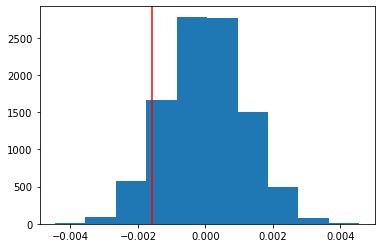

In [37]:
#Plot Null distribution
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='red')

In [38]:
(null_vals > obs_diff).mean()

0.9101

In [39]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page== "old_page"').user_id.nunique()
convert_new = converted_old = df2.query('converted == 1 and landing_page== "new_page"').user_id.nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

convert_old,convert_new , n_old , n_new

(17489, 17264, 145274, 145310)

In [40]:
# compute the sm.stats.proportions_ztest using the alternative
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old])
                                              ,np.array([n_new,n_old]), alternative = 'larger')
z_score, p_value

#  it's a one tail test so a z-score past 1.96 will be significant.

(-1.3109241984234394, 0.9050583127590245)

### LOGISTIC REGRESSION

 Under logistic model, the hypothesis test is under : 

 H0: p_new =  p_old , H1: p_new ≠ p_old (Two sided test)

In [41]:
# create a column for the intercept
df2['intercept'] = 1
df2.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_9652\4201628474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1


,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [42]:
# create a dummy variable column for which page each user received
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_9652\3444522949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ab_page'] = pd.get_dummies(df['group'])['treatment']


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [43]:
log_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Nov 2022   Pseudo R-squ.:               8.085e-06
Time:                        22:45:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

In [45]:
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
# join two dataframes on common column 'user_id'
df3 = df2.join(df_country.set_index('user_id'),on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [47]:
df3['country'].value_counts()

US    203620
UK     72466
CA     14499
Name: country, dtype: int64

In [48]:
# create dummy variables for country
df3[['US','UK','CA']] = pd.get_dummies(df3['country'])
df3 = df3.drop(df3['CA'])
df3['intercept'] = 1
log_mod = sm.Logit(df3['converted'], df3[['intercept','US','UK','ab_page']]) 
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Nov 2022   Pseudo R-squ.:               2.326e-05
Time:                        22:45:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1756
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.760      0.000      -2.007      -1.972
US            -0.0408      0.027     -1.516      0.129      -0.093       0.012
UK             0.0099      0.013      0.743      0.458      -0.016       0.036
ab_page       -0.0150      0.011     -1.309      0.191      -0.037       0.007
==============================================================================
"""

In [49]:
# create dummy variables for country
df3['intercept'] = 1
# interaction between page and country 
df3['US_new'] = df3['US'] * df3['ab_page']
df3['UK_new'] = df3['UK'] * df3['ab_page']
log_mod = sm.Logit(df3['converted'], df3[['intercept','ab_page','US','UK','US_new' ,'UK_new' ]])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290577
Method:                           MLE   Df Model:                            5
Date:                Mon, 14 Nov 2022   Pseudo R-squ.:               3.485e-05
Time:                        22:45:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1915
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.341      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.508      0.132      -0.047       0.006
US            -0.0176      0.038     -0.466      0.641      -0.091       0.056
UK            -0.0058      0.019     -0.307      0.759      -0.043       0.031
US_new        -0.0469      0.054     -0.871      0.384      -0.152       0.059
UK_new         0.0314      0.027      1.182      0.237      -0.021       0.084
==============================================================================
"""

#### Other Models

In [50]:
#Drop the timestamp column
df2=df2.drop(['timestamp'],axis=1)
df2.head()

,user_id,group,landing_page,converted,intercept,ab_page
0,851104,control,old_page,0,1,0
1,804228,control,old_page,0,1,0
2,661590,treatment,new_page,0,1,1
3,853541,treatment,new_page,0,1,1
4,864975,control,old_page,1,1,0


#### Splitting the data

In [51]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2.loc[:, df2.columns != 'converted'],\
                                                    df2['converted'], test_size=0.2)

#### label encoding the categorical values

In [52]:

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X_train['group'] = lb.fit_transform(X_train['group'])
X_test['group'] = lb.transform(X_test['group'])

X_train['landing_page'] = lb.fit_transform(X_train['landing_page'])
X_test['landing_page'] = lb.transform(X_test['landing_page'])


In [53]:
X_train.head()

,user_id,group,landing_page,intercept,ab_page
20549,829757,1,0,1,1
191780,770692,1,0,1,1
20247,723852,1,0,1,1
98663,669689,0,1,1,0
197567,865624,0,1,1,0


#### Function for printing the evaluation scores related to a regression problem

In [54]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

**MULTIPLE LINEAR REGRESSION**

In [55]:
import statsmodels.api as sm

#user_id not significant hence drop
X_train_refined = X_train.drop(columns=['user_id'], axis=1) 
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

In [56]:
X_test_refined = X_test.drop(columns=['user_id'], axis=1)
y_pred = linear_regression.predict(X_test_refined)

In [57]:
calculate_metrics(y_test, y_pred)

RMSE Score: 0.32158389496122924
R2_Squared: -8.564272403321915e-05
MAE Score: 0.20923979436382859


In [59]:
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3278
Date:                Mon, 14 Nov 2022   Prob (F-statistic):              0.805
Time:                        22:50:07   Log-Likelihood:                -68731.
No. Observations:              232468   AIC:                         1.375e+05
Df Residuals:                  232464   BIC:                         1.375e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
group         1.064e+10   2.05e+10      0.519   

#### Computing the p-value for each column

In [60]:

pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

,Terms,p_value
0,group,0.603606
3,ab_page,0.604800
2,intercept,0.713284
1,landing_page,0.713284


**DECISION TREES**

In [61]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)

calculate_metrics(y_test, y_preds)

RMSE Score: 0.32158336293396056
R2_Squared: -8.233365040610785e-05
MAE Score: 0.20918283708491345
